In [1]:
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np

models = [
    ["anthropic", "claude-3-opus-20240229"],
    ["anthropic", "claude-3-sonnet-20240229"],
    ["anthropic", "claude-3-haiku-20240307"],
    ["openai", "gpt-3.5-turbo-0125"],
    ["openai", "gpt-4-turbo-2024-04-09"],
]

model_names_nice = [
    "Claude 3 Opus",
    "Claude 3 Sonnet",
    "Claude 3 Haiku",
    "GPT 3.5 Turbo",
    "GPT 4 Turbo Apr 2024 ",
]

In [2]:
data = {}

for m in models:
    provider, model = m
    totals = []
    for i in range(10):
        try:
            file_path = "-".join([provider, str(i), model, "gpqa"]) + ".json"
            with open(file_path, "r") as json_file:
                # Dump the dictionary to the file
                loaded_data = json.load(json_file)
            totals.append(sum(loaded_data["grading"]) / len(loaded_data["grading"]))
        except:
            continue
    data[model] = totals

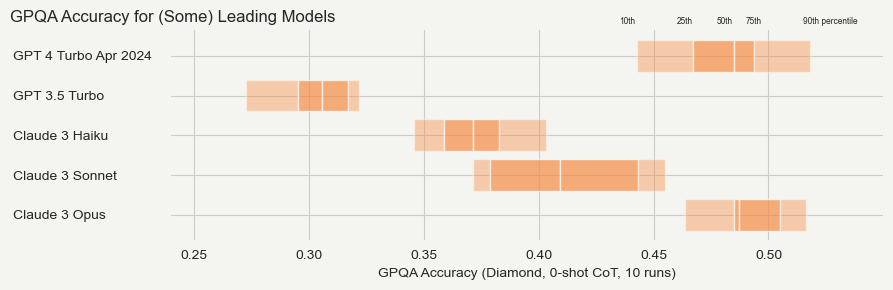

In [46]:
sns.set_style("whitegrid")
# Calculate percentiles
percentiles = {}
for key in data:
    percentiles[key] = {
        "10th": np.percentile(data[key], 10),
        "25th": np.percentile(data[key], 25),
        "Median": np.percentile(data[key], 50),
        "75th": np.percentile(data[key], 75),
        "90th": np.percentile(data[key], 90),
    }

# Plotting
fig, ax = plt.subplots(figsize=(9, 3))
bar_height = 0.8
opacity = [0.4, 0.7, 0.7, 0.4]
color = "#f68d45"


for i, key in enumerate(data.keys()):
    left = percentiles[key]["10th"]
    for j, percentile in enumerate(["25th", "Median", "75th", "90th"]):
        width = percentiles[key][percentile] - left
        ax.barh(
            i,
            width,
            bar_height,
            left=left,
            color=color,
            alpha=opacity[j],
        )
        left += width

fig.patch.set_facecolor("#f4f4f0")
ax.set_facecolor("#f4f4f0")

ax.set_yticks(range(len(data.keys())))
ax.set_yticklabels(model_names_nice)
ax.set_xticks([0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
sns.despine(bottom=True, left=True, right=True)
ax.set_xlabel("GPQA Accuracy (Diamond, 0-shot CoT, 10 runs)")
ax.set_xlim(0.24, 0.55)
ax.tick_params(axis="y", which="major", pad=110)
for tick in ax.yaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

bbox = ax.get_yticklabels()[-1].get_window_extent()
x, _ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
ax.set_title(
    "GPQA Accuracy for (Some) Leading Models",
    ha="left",
    x=x,
)


plt.text(0.435, 4.8, "10th", fontdict={"size": 6})
plt.text(0.46, 4.8, "25th", fontdict={"size": 6})
plt.text(0.4775, 4.8, "50th", fontdict={"size": 6})
plt.text(0.49, 4.8, "75th", fontdict={"size": 6})
plt.text(0.515, 4.8, "90th percentile", fontdict={"size": 6})


plt.tight_layout()
plt.savefig("all_samples.png", dpi=300, bbox_inches="tight")

plt.show()

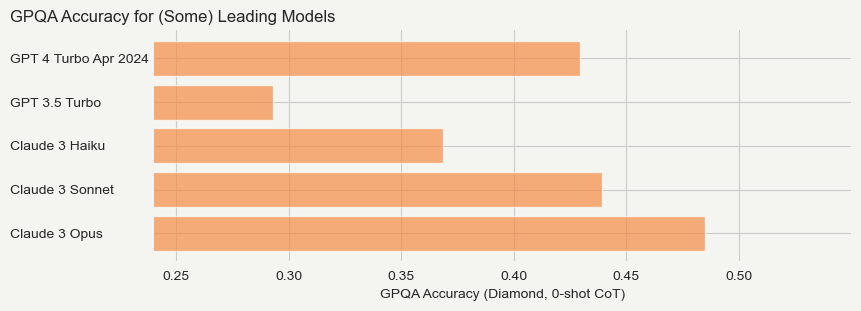

In [47]:
sns.set_style("whitegrid")
# Calculate percentiles
percentiles = {}
for key in data:
    percentiles[key] = {
        "Median": np.random.choice(data[key]),
    }

# Plotting
fig, ax = plt.subplots(figsize=(9, 3))
bar_height = 0.8
opacity = 0.7
color = "#f68d45"


for i, key in enumerate(data.keys()):
    left = 0
    for j, percentile in enumerate(["Median"]):
        width = percentiles[key][percentile] - left
        ax.barh(
            i,
            width,
            bar_height,
            left=left,
            color=color,
            alpha=opacity,
        )
        left += width


fig.patch.set_facecolor("#f4f4f0")
ax.set_facecolor("#f4f4f0")

ax.set_yticks(range(len(data.keys())))
ax.set_yticklabels(model_names_nice)
ax.set_xticks([0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
sns.despine(bottom=True, left=True, right=True)
ax.set_xlabel("GPQA Accuracy (Diamond, 0-shot CoT)")
ax.set_xlim(0.24, 0.55)
ax.tick_params(axis="y", which="major", pad=100)
for tick in ax.yaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

bbox = ax.get_yticklabels()[-1].get_window_extent()
x, _ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
ax.set_title(
    "GPQA Accuracy for (Some) Leading Models",
    ha="left",
    x=x,
)


plt.savefig("one_sample.png", dpi=300, bbox_inches="tight")
plt.show()

In [80]:
from statsmodels.stats.power import GofChisquarePower

power = 0.9
alpha = 0.05
effect_size = 0.1  # Cohen's w
df = 1
analysis = GofChisquarePower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(sample_size)

1050.7419410837392


In [93]:
from statsmodels.stats.power import TTestPower

power = 0.9
effect_size = 0.8  # Cohen's d
alpha = 0.05
alternative = "two-sided"

analysis = TTestPower()

sample_size = analysis.solve_power(
    effect_size=effect_size, power=power, alpha=alpha, alternative=alternative
)

print(sample_size)

18.446225469774838


In [104]:
st.ttest_ind(
    data["gpt-4-turbo-2024-04-09"], data["claude-3-opus-20240229"], equal_var=False
)

TtestResult(statistic=-0.6824307494848405, pvalue=0.5050138592619167, df=15.538295366181075)